In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne

In [2]:
raw = mne.io.read_raw_eeglab('sep_uwgr_prepro.set', preload=False)

Reading /data/u_brenner_software/eeg_data_analysis/eeg_llm/sep_uwgr_prepro.fdt


/tmp/ipykernel_92217/2498423444.py:1: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab('sep_uwgr_prepro.set', preload=False)


In [3]:
events, event_id = mne.events_from_annotations(raw)

tmin = -0.05
tmax = 0.22

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=False)

Used Annotations descriptions: ['1']
Not setting metadata
6038 matching events found
No baseline correction applied
0 projection items activated


In [4]:
all_data = epochs.get_data()

Loading data for 6038 events and 554 original time points ...
0 bad epochs dropped


Loading data for 1 events and 554 original time points ...


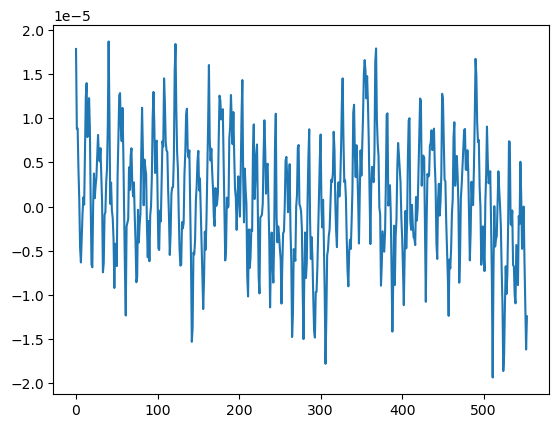

In [5]:
single_epoch = epochs[6000]
#single_epoch.plot()
plt.plot(single_epoch.get_data()[0,5])

In [6]:
avg_data = epochs.average().data

In [9]:
U, S, Vh = np.linalg.svd(avg_data[:369], full_matrices=True)

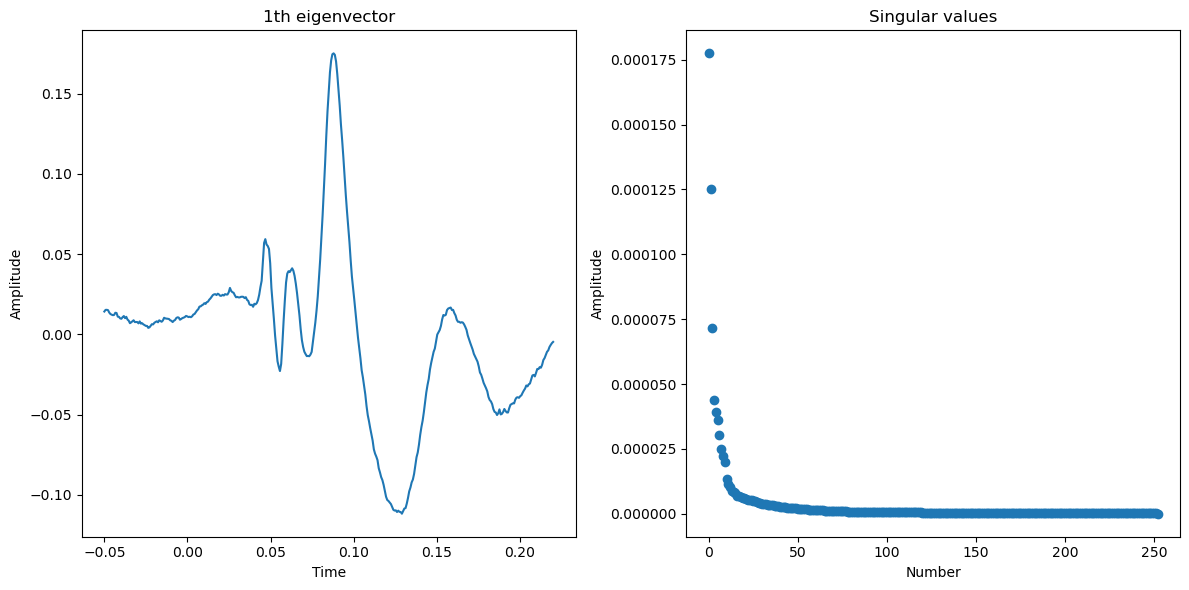

In [10]:
timepoints = np.linspace(tmin, tmax, 369)

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot on the first subplot
eig_n = 1
ax1.plot(timepoints, Vh[eig_n,:369])
ax1.set_title(str(eig_n) + 'th eigenvector')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

# Plot on the second subplot
ax2.plot(S,'o')
ax2.set_title('Singular values')
ax2.set_xlabel('Number')
ax2.set_ylabel('Amplitude')

# Display the plots
plt.tight_layout()
plt.show()

In [27]:
proj_U1 = np.dot(U.T[0], all_data)
proj_U2 = np.dot(U.T[1], all_data)

shuffled_proj_U1 = np.copy(proj_U1)
shuffled_proj_U2 = np.copy(proj_U2)
np.random.shuffle(shuffled_proj_U1)
np.random.shuffle(shuffled_proj_U2)

In [26]:
import gc

rand1 = np.random.random((3,5))
rand2 = np.random.random((3,5))
conc_rand = np.array([rand1, rand2])

def shuffle_axis(arr):
    np.random.shuffle(arr)
    return arr

shuffled_conc_rand = np.apply_along_axis(shuffle_axis, 1, conc_rand)

print(conc_rand)
print(shuffled_conc_rand)

del rand1
del rand2
del conc_rand
gc.collect()

[[[0.17893168 0.94808799 0.89872173 0.17521927 0.80148017]
  [0.40008114 0.14825228 0.88505939 0.56922754 0.51362638]
  [0.58783595 0.5315175  0.15298892 0.36671532 0.22969458]]

 [[0.69903679 0.49418936 0.28217056 0.20374499 0.29181343]
  [0.28432117 0.3655748  0.99330492 0.77862593 0.00785016]
  [0.93736776 0.05948633 0.82750736 0.44032943 0.77268861]]]
[[[0.17893168 0.94808799 0.89872173 0.17521927 0.80148017]
  [0.40008114 0.14825228 0.88505939 0.56922754 0.51362638]
  [0.58783595 0.5315175  0.15298892 0.36671532 0.22969458]]

 [[0.69903679 0.49418936 0.28217056 0.20374499 0.29181343]
  [0.28432117 0.3655748  0.99330492 0.77862593 0.00785016]
  [0.93736776 0.05948633 0.82750736 0.44032943 0.77268861]]]


90

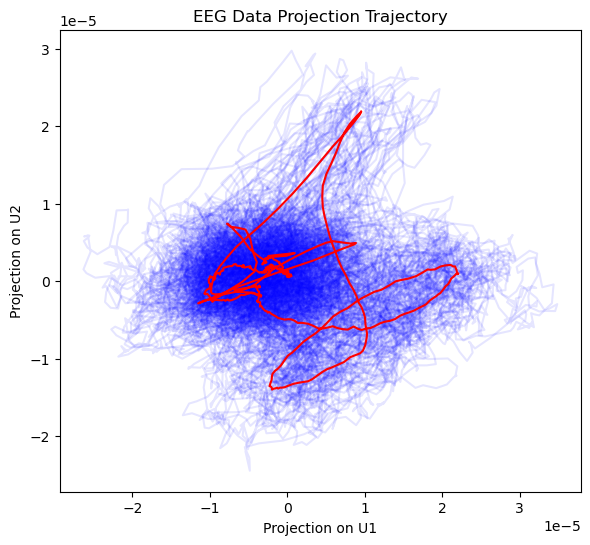

In [51]:
# Plot the trajectory (proj_U1 vs proj_U2)

n_batches = 50
batch_size = len(epochs) // n_batches

plt.figure(figsize=(12, 6))
# for trial_U1, trial_U2 in zip(proj_U1, proj_U2):
#     plt.plot(trial_U1, trial_U2, alpha=0.002, color='blue')  # Each trial

for i in range(n_batches):
    batch_size_post = batch_size if (i+1) != n_batches else len(epochs) % n_batches

    batch_U1 = np.mean(shuffled_proj_U1[i*batch_size:(i+1)*batch_size_post], axis=0)
    batch_U2 = np.mean(shuffled_proj_U2[i*batch_size:(i+1)*batch_size_post], axis=0)
    plt.plot(batch_U1, batch_U2, alpha=0.1, color='blue') # Each batch

plt.plot(S[0]*Vh[0], S[1]*Vh[1], color='red')

# Add labels and title
plt.xlabel('Projection on U1')
plt.ylabel('Projection on U2')
plt.title('EEG Data Projection Trajectory')

# Show the plot

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

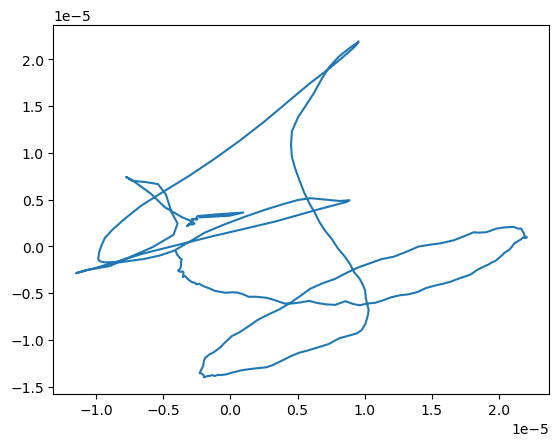

In [13]:
plt.plot((U.T[0] @ avg_data)[100:369],(U.T[1] @ avg_data)[100:369])

In [17]:
import pandas as pd
data_avg = pd.read_csv('UwGr_SEP_prepro.csv', header=None, index_col=0)

In [123]:
#Subject 11 = UwGr

data_paper = pd.read_csv('PlosOne/11_SEP_prepro_-50_130ms.csv', header=None, index_col=0)

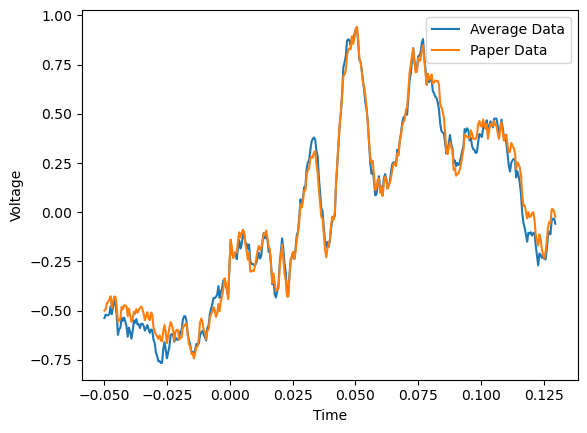

In [45]:
plt.plot(timepoints[:369], data_avg.iloc[100, :369], label='Average Data')
plt.plot(timepoints[:369], data_paper.iloc[100], label='Paper Data')

plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()

plt.show()

In [124]:
U_paper, S_paper, Vh_paper = np.linalg.svd(data_paper, full_matrices=True)

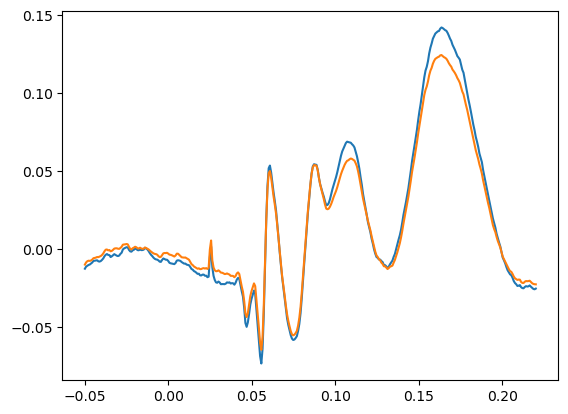

In [217]:
plt.plot(timepoints[:369],-Vh_paper[0],timepoints[:369],Vh[0][:369])


In [191]:
Vh[1] @ ((U.T[1] @ avg_data[:369]))

0.00012521580056989117